# A notebook with the FRB/US model
This notebook is based on the the FRB/US model packages located here (https://www.federalreserve.gov/econres/us-models-package.htm). The packages provides an Eviews (https://www.eviews.com/) implementation. The Eviews modelspecification has been transformed to ModelFlow BusinessLogic specification. 

In this notebook you can make your own experiments by updating variables. Also You can watch some of the capabilities of ModelFlow

FRB/US comes in two flawors: **VAR** in which expectaions are generated by backward looking equations, and **MCE** in which expectation are based on leaded values. 

This notebook implement the **VAR** flavour. 

The tool used is highly experimental and the results are purely for illustration. 

You can run each cell by pressing the run tool or shift+enter
To run all cells use select cell/run all in the menu bar. 

In [1]:
%load_ext autoreload
%autoreload 2

# Import Python libraries

In [2]:
%matplotlib inline

import pandas as pd
from numba import jit

from modelclass import model  
import modelmf

In [3]:
model.widescreen()
lpng = 0  # set 0 to render in github, else set to 0 

# Load the model and the data 
The model and the data has been prepared in a preprocessor step and has been wrapped into one file. 

In [4]:
mfrbus, basedf =  model.modelload('models/frbus_var.pcim')

res = mfrbus(basedf,'2021q1','2060q4',silent=1,stats=0)

# Run alternative 

In [5]:
# Make a new DataFrame
altdf = basedf.copy()

# Update variables in the dataframe
altdf.loc['2024q4','RFFINTAY_AERR'] = altdf.loc['2024q4','RFFINTAY_AERR']+0.5


#Run the model 
with model.timer('Solve Frbus'):
    res2 = mfrbus(altdf,ldumpvar = 0,solver='sim',newton_absconv=0.0001,ljit=1,stringjit=0)


Compile prolog: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 92.99code chunk/s
Compile core  : 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 142.53code chunk/s
Compile epilog: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 124.74code chunk/s


Solve Frbus took       :         0.3872742653 Seconds


# Show the results 

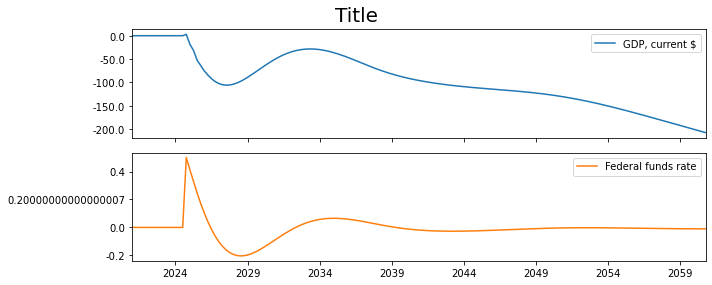

In [6]:
_ = mfrbus['XGDPN RFF'].dif.rename().plot(colrow=1,sharey=0)

# How is the interest rate determined
We look at 8 levels of proceeding variables. But only for variables which attributes to more than 10 percent to the next level. 

This the dependency tree is pruned to only include the significant variables. 

Mouseover the nodes and edges will display some informations. 

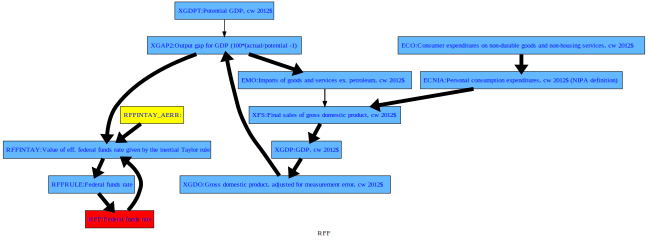

In [7]:
mfrbus.smpl('2024q4','2027q4')
mfrbus.RFF.tracepre(up=8,filter=10,HR=1,pnk=lpng ,size= (9,9)) 

# Lets look at how each variable contributes to changes in the equation
Here we look at the developement in attribution for one variable. 

FRML <Z> RFFINTAY = RFFINTAY_A + RFFINTAY_AERR +  (.85*RFF(-1)+(1-.85)*(RSTAR+(PICXFE+PICXFE(-1)+PICXFE(-2)+PICXFE(-3))/4+0.5*((PICXFE+PICXFE(-1)+PICXFE(-2)+PICXFE(-3))/4-PITARG)+1.0*XGAP2))  $


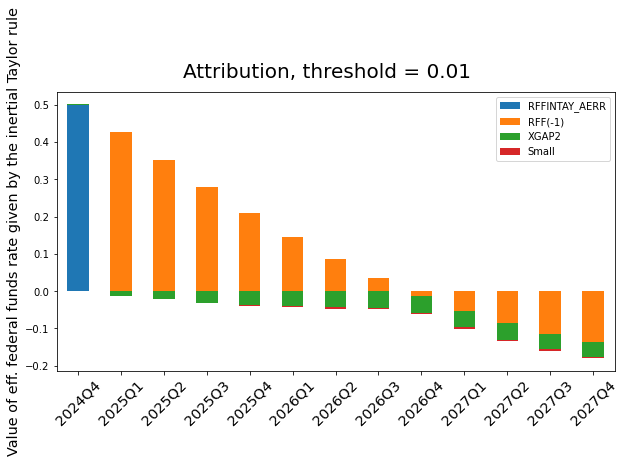

In [8]:
lookat = 'RFFINTAY'
print(mfrbus.allvar[lookat]['frml'])
mfrbus.dekomp_plot(lookat,pct=0,lag=1,threshold=0.01);

# We can also look downstream. 
Where wil this variable have significant impact. 

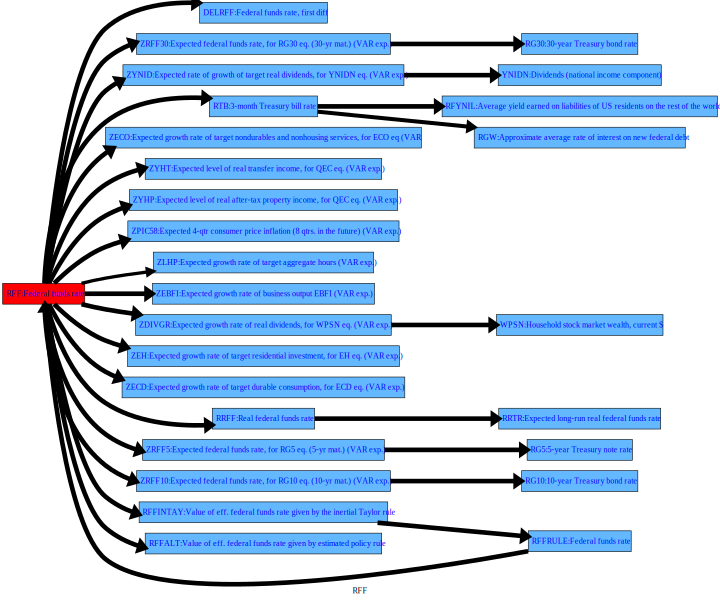

In [9]:
mfrbus.draw('rff',up=2,down=2,pdf=0,
                lag=0,filter = 10,HR=0,att=True,size=(10,10),all=0,png=lpng )

# Or we can use a separate widget to drill up and down the dependency tree
This is still experimental, and the layout needs some tender care

In [10]:
mfrbus.modeldash('RFF',jupyter=True,filter = 10,inline=True)

Still worlking on the layout of this


In [11]:
if 0:  # set to 0 to skip, set to 1 to draw a dependency graph. Takes a little while 
    mfrbus.drawendo(lag=0,title='FRB/US endogeneous interpendencies',svg=1,browser=1)
# you will find the output files in different format in the /graph folder (graph/)

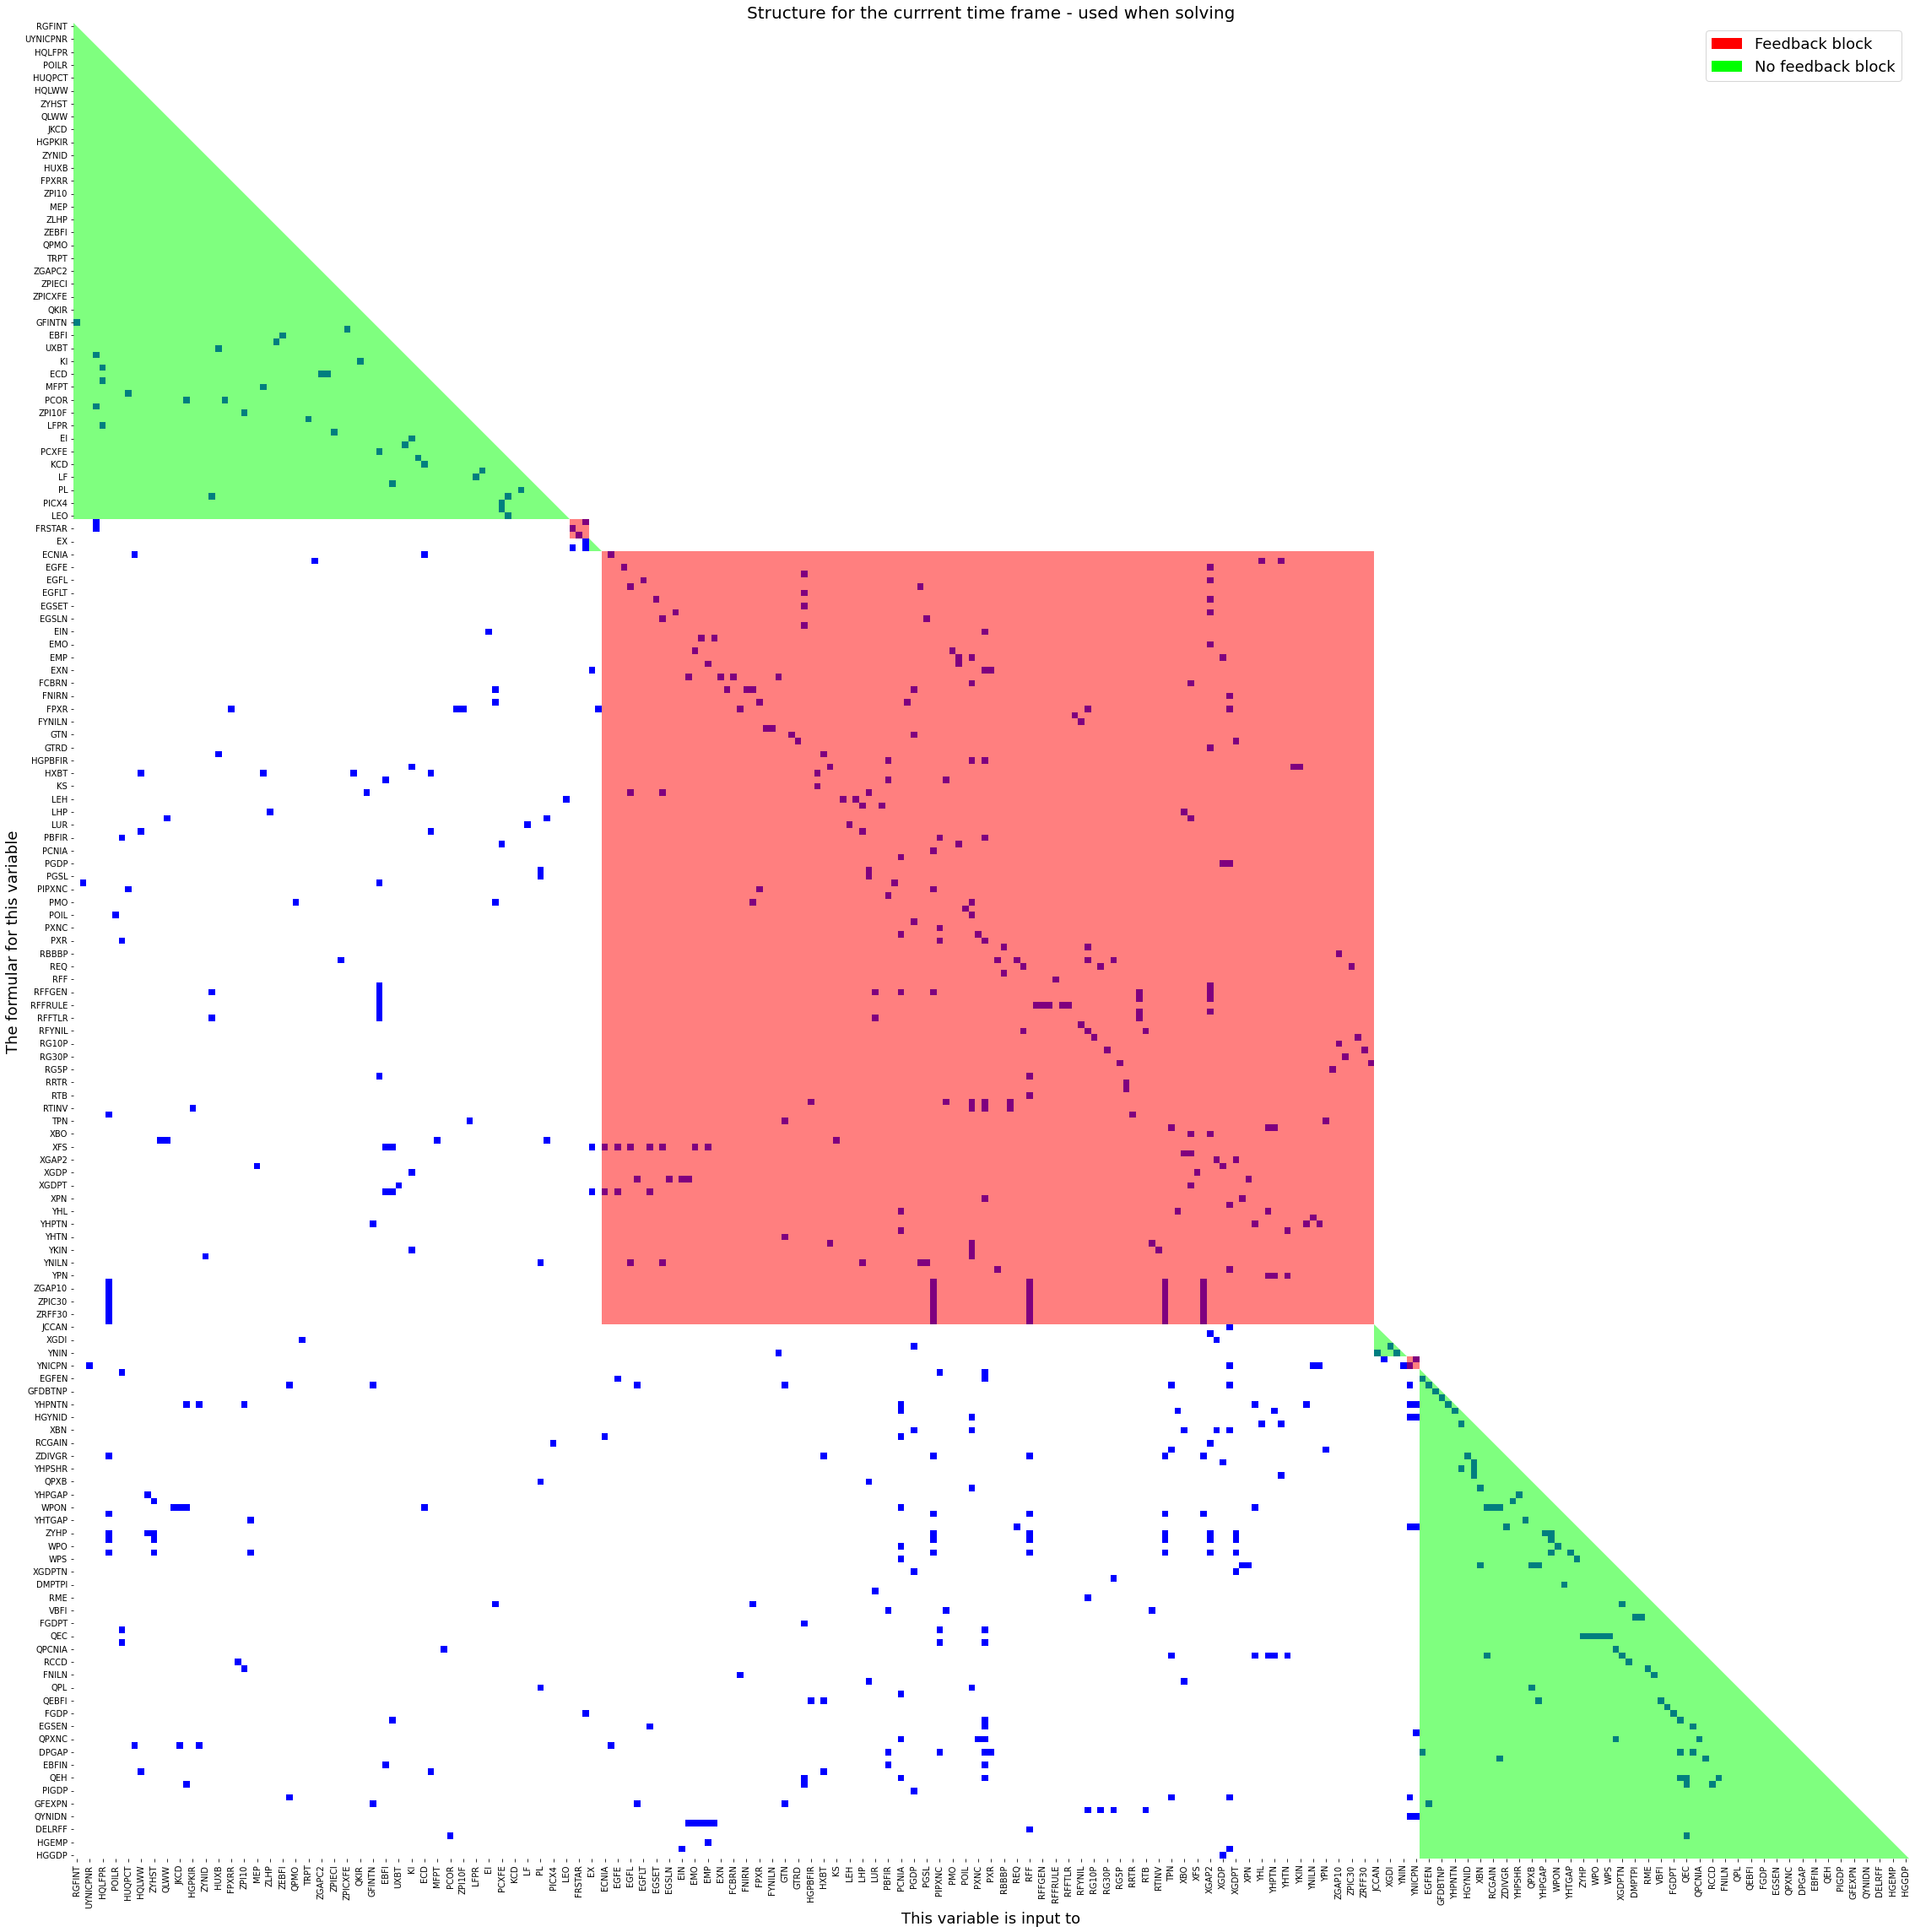

In [12]:
fig   = mfrbus.plotadjacency(size=(40,40),title= 'Structure for the currrent time frame - used when solving')
fig.savefig('graph/FRB-US causality structure current time.pdf')

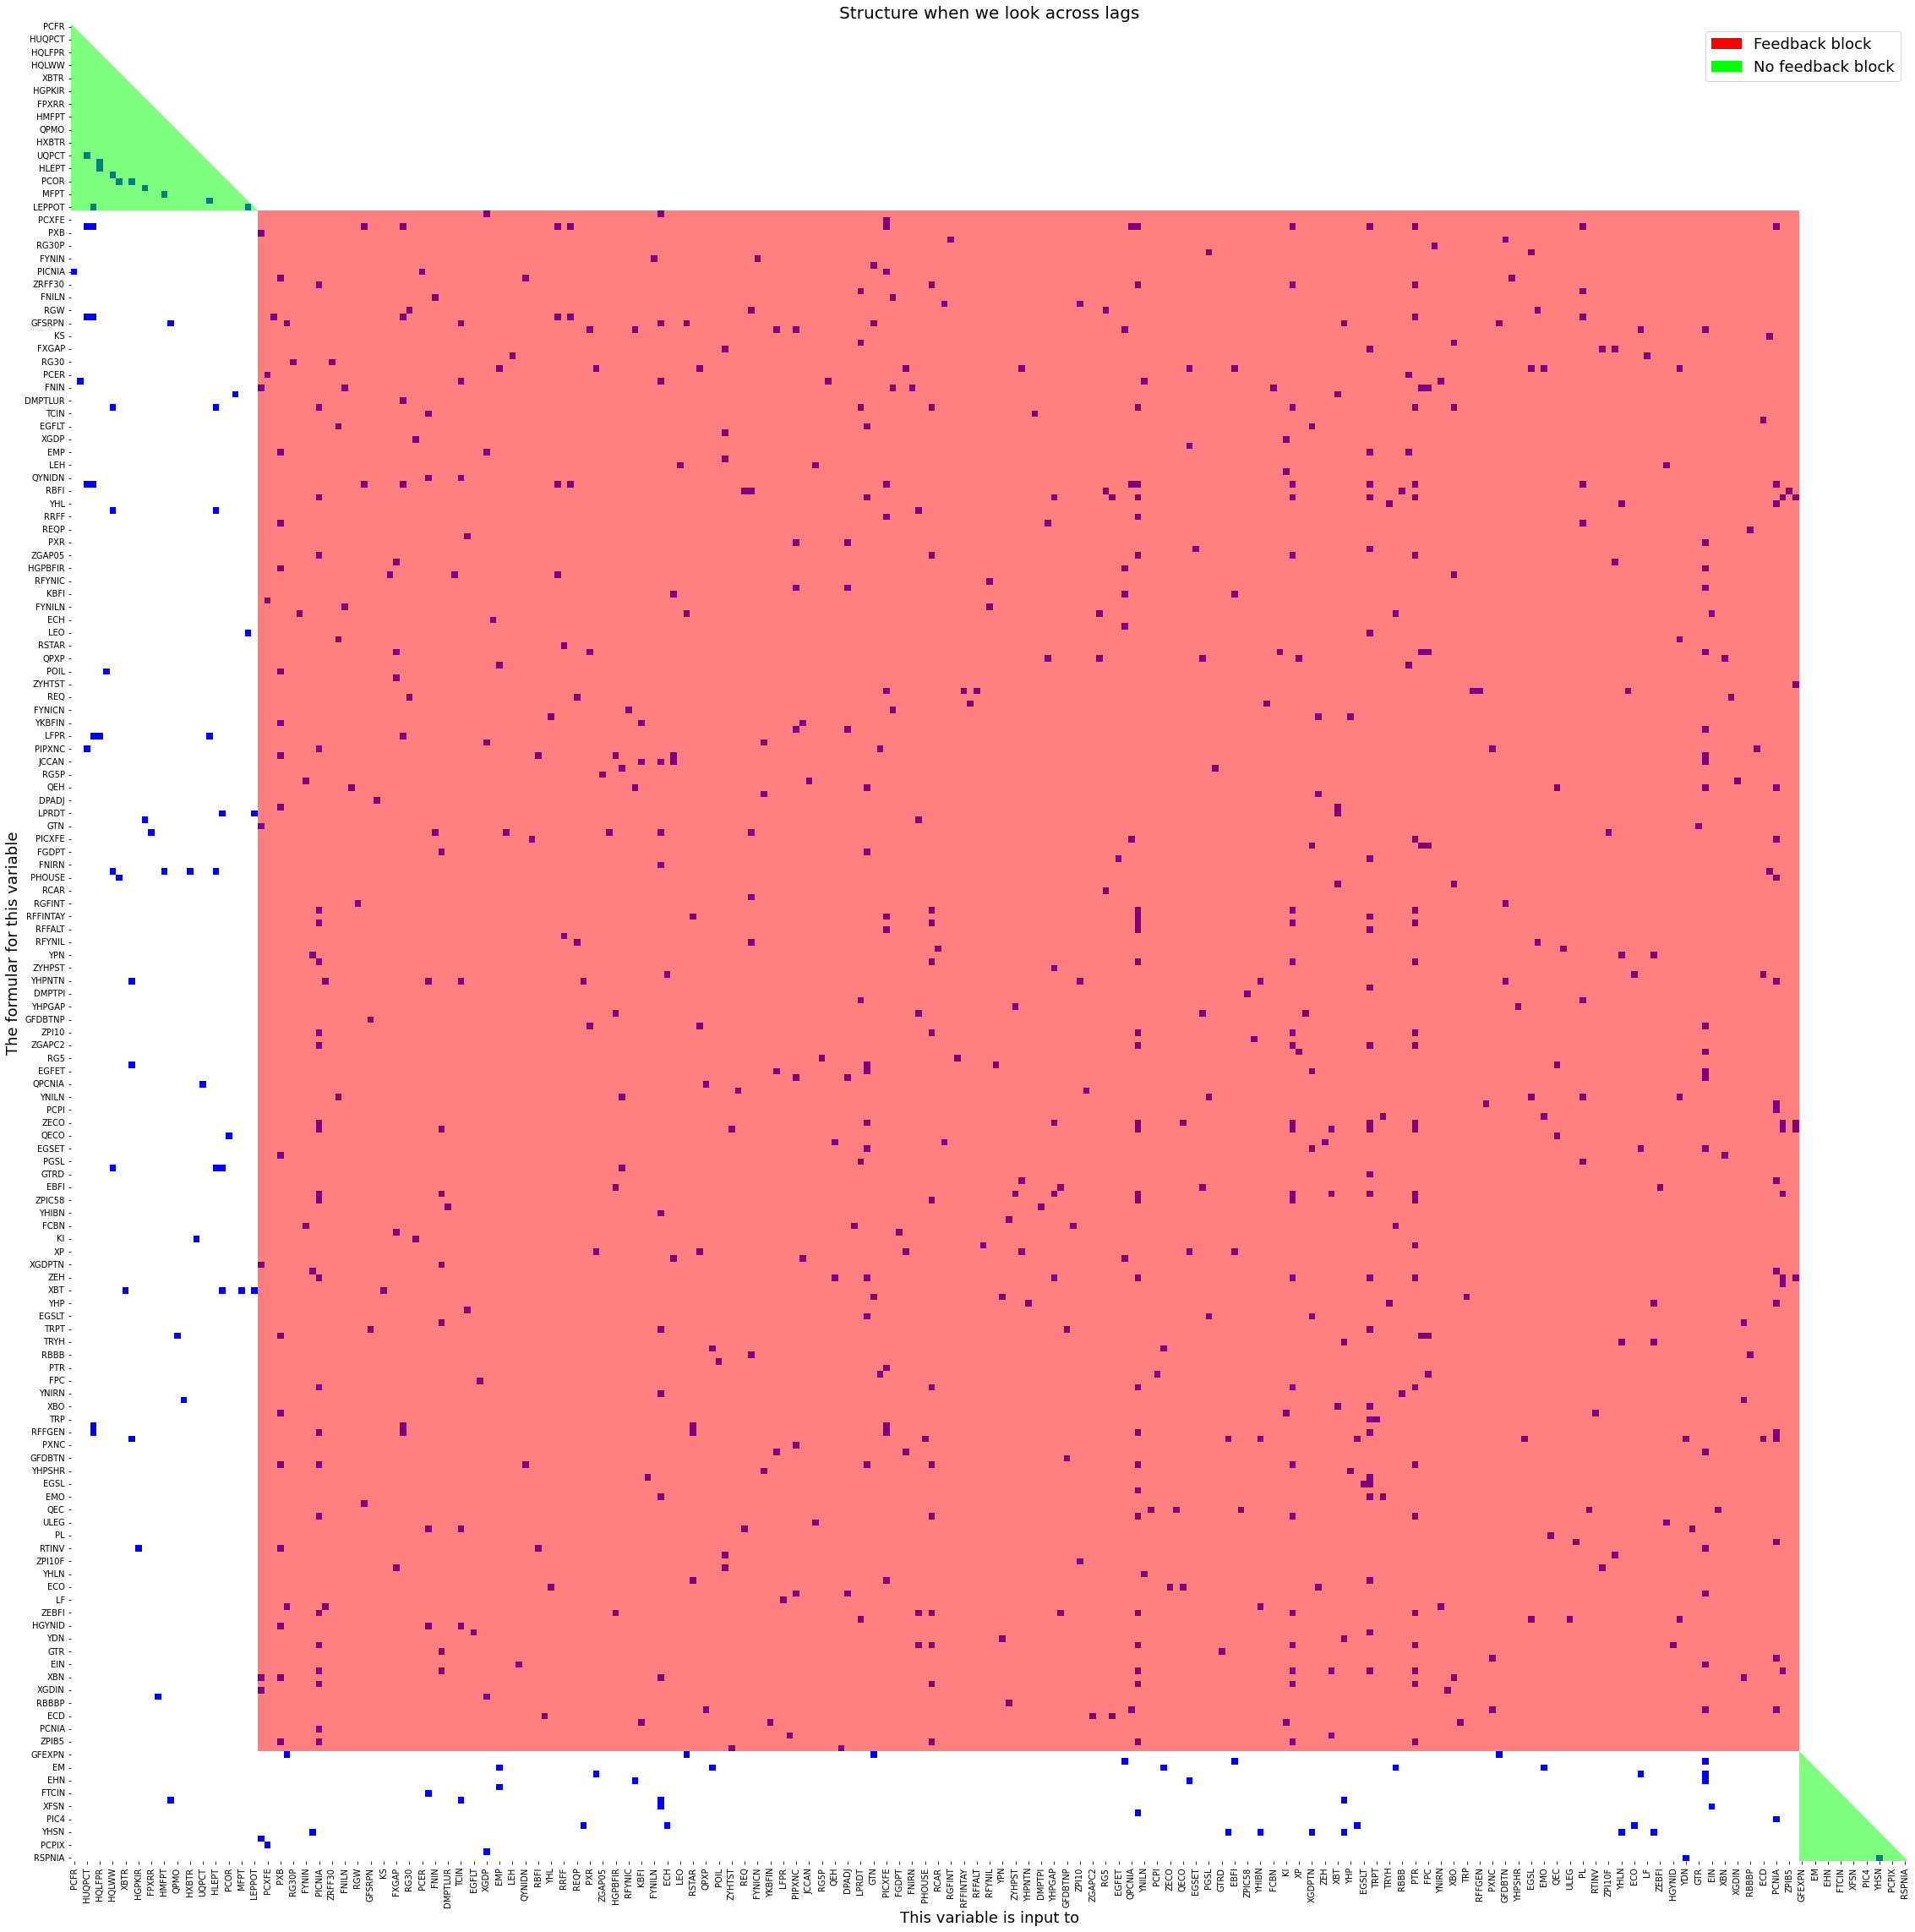

In [13]:
fig   = mfrbus.plotadjacency(size=(40,40),nolag=True,title='Structure when we look across lags')
fig.savefig('graph/FRB-US causality structure across lags.pdf')